In [10]:
from prnu_python.prnu import *

import numpy as np
from PIL import Image

from cnn_fast_sdi.utility_dataset import load_prnu, load_res, preprocessing_function
from cnn_fast_sdi.architectures import makeNetwork as make_network
import matplotlib.pyplot as plt
import os
from os.path import join

In [12]:
def get_device(path, prnus, model):
    im = Image.open(path)
    im_arr = np.asarray(im)
    
    im_cut = cut_ctr(im_arr, (512, 512, 3))
    noise_residual = extract_single(im_cut)
    
    res_processed = preprocessing_function(noise_residual)
    res_processed = np.tile(res_processed[None, :, :], (num_dev, 1, 1))
    data = np.stack((list_prnu, res_processed), -1)
    
    score = model.predict_on_batch(data)[:, 1]
    pos = np.argmax(score)
    
    plt.imshow(im)
    plt.show()
    print(f"The device that took the photo is {devices_names[pos]}")
    
    return devices_names[pos]

In [5]:
devices_names = ['Acer_AspireE5', 'Apple_MacBookAir2018', 'Apple_MacBookAir', 
                 'Apple_iPadAir3', 'Apple_iPhone11', 'Apple_iPhone13', 
                 'Apple_iPhoneX', 'Asus_VivoBookPro', 'HP_Laptop15', 
                 'Huawei_P20Lite', 'Redmi_Note7']

In [6]:
list_dev_test = 'F01;F02;F03;F04;F05;F06;F07;F08;F09;F10;F11'
list_dev = list_dev_test.split(';')

crop_size = 512
num_dev = len(list_dev)
model_dir = 'cnn_fast_sdi/downloaded_pretrained_models/cropr512_Pcn'

In [7]:
# define the model used
model = make_network(input_shape=(None, None, 2), base_network="Pcn", num_classes=2,
                     model_path=model_dir)

(?, ?, ?, 64) <dtype: 'float32'>
(?, ?, ?, 32) <dtype: 'float32'>
(?, ?, ?, 64) <dtype: 'float32'>
(?, ?, ?, 32) <dtype: 'float32'>
loaded  cnn_fast_sdi/downloaded_pretrained_models/cropr512_Pcn/model_weights.h5


In [8]:
print("Preparing test data loader")
# list with the device PRNUs
list_prnu = [preprocessing_function(load_prnu(item, crop_size)) for item in list_dev]
list_prnu = np.stack(list_prnu, 0)

Preparing test data loader


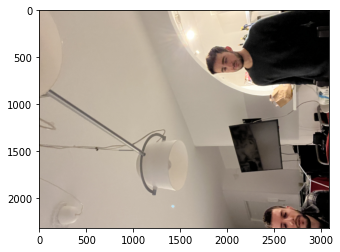

The device that took the photo is Apple_iPhone13


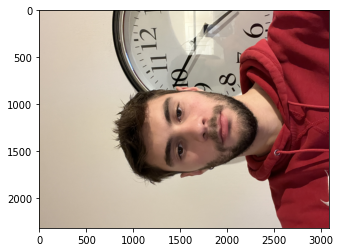

The device that took the photo is Apple_iPhone13


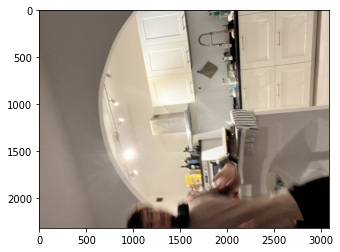

The device that took the photo is Apple_iPhone13


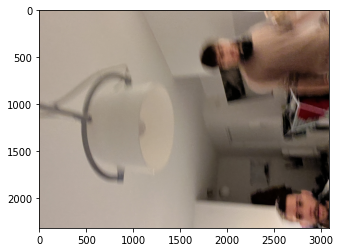

The device that took the photo is HP_Laptop15


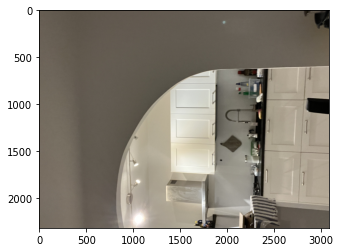

The device that took the photo is Apple_iPhone13


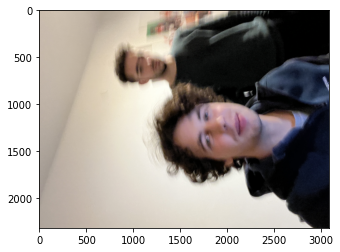

The device that took the photo is Apple_iPhone13


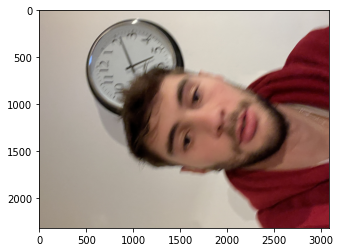

The device that took the photo is Apple_iPhone13


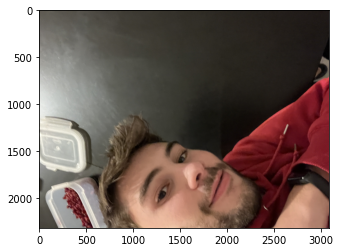

The device that took the photo is Apple_iPadAir3


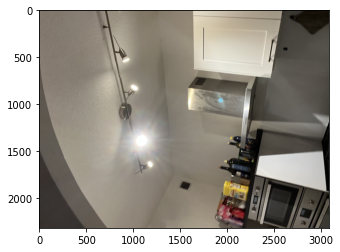

The device that took the photo is Huawei_P20Lite


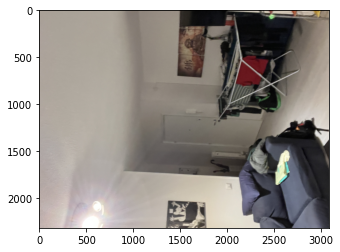

The device that took the photo is Apple_iPhone13
Accuracy: 70.0%


In [17]:
path = "./shared/Telegram/"
files = os.listdir(path)

correct = 0
tot = 0

for file in files:
    if '.jpg' in file.lower():
        name = get_device(join(path, file), list_prnu, model)
        if name == "Apple_iPhone13":
            correct += 1
        tot += 1
        print("="*50)

print(f"Accuracy: {100*correct/tot:.1f}%")